<h1 style=font-size:56px>SARS-CoV-2 Data Science Project</h1>                                              

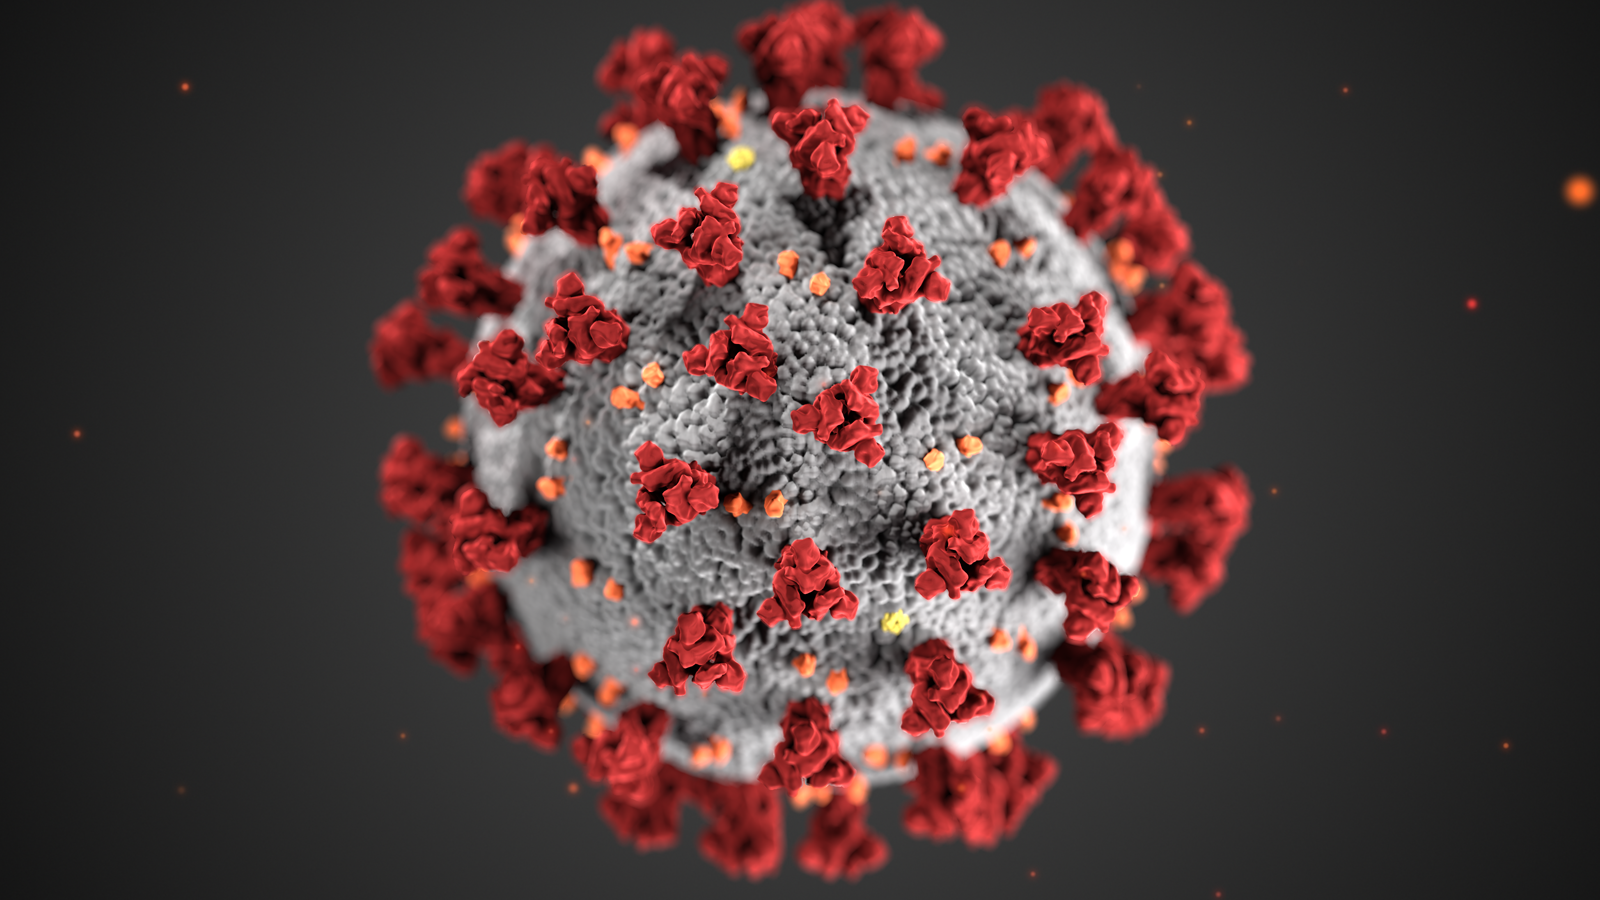
   
**Project Description:**
The purpose of this project is to apply Data Science techniques to practical, real world data sets. I began by graphing various features against one another to identify any patterns or trends that may reside within the data. My current goal is to validate any potential relationships via statistical measures (p-values) and then create a machine learning model that can reasonably estimate future results. The data set I used for this project came from Our World in Data's Github and accounts for the latest updates they have regarding various features of SARS-CoV-2 (total vaccinated, location, continent, total deaths, population density, etc.).

<br />

**Data Source:**
[OWID GitHub Data Source](https://github.com/owid/covid-19-data/blob/master/public/data/latest/owid-covid-latest.json)
<br />
<br />

**Data Science Packages Used**:
<ol>
    <li>Numpy</li>
    <li>Pandas</li>
    <li>Matplotlib</li>
    <li>Seaborn</li>
    <li>Scipy</li>
    <li>Scikit Learn</li>
</ol>


In [18]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import json

In [19]:
# import sys
# !{sys.executable} -m pip install <PACKAGE_NAME>

# Loading JSON from OWID GitHub into Pandas DataFrame


In [20]:
results = requests.get(url="https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.json")
deserialized_json = json.loads(results.content)

# Transposing to represent map rows to countries and columns to SARS-CoV-2 characteristics
df = pd.DataFrame.from_dict(deserialized_json).transpose()

In [21]:
# Saving JSON locally
with open("latest.json") as json_file:
    json.dumps(results.json())
    json_file.close()

In [22]:
# Filtering any any entries with OWID since they represent regional statistics
countries = df[df["continent"].notnull()].drop(["OWID_KOS"], axis=0)

# Part I: Gaining Insight on Total Deaths, Population, and Region

## Scatterplot Marking the Relationship between Population and Deaths Per Country
* Does not include CHN/IND
* Does not include entries marked with OWID prefixes those seem to indicate regional statistics

In [23]:
# Setting Canvas Style for Plots
plt.style.use("ggplot")

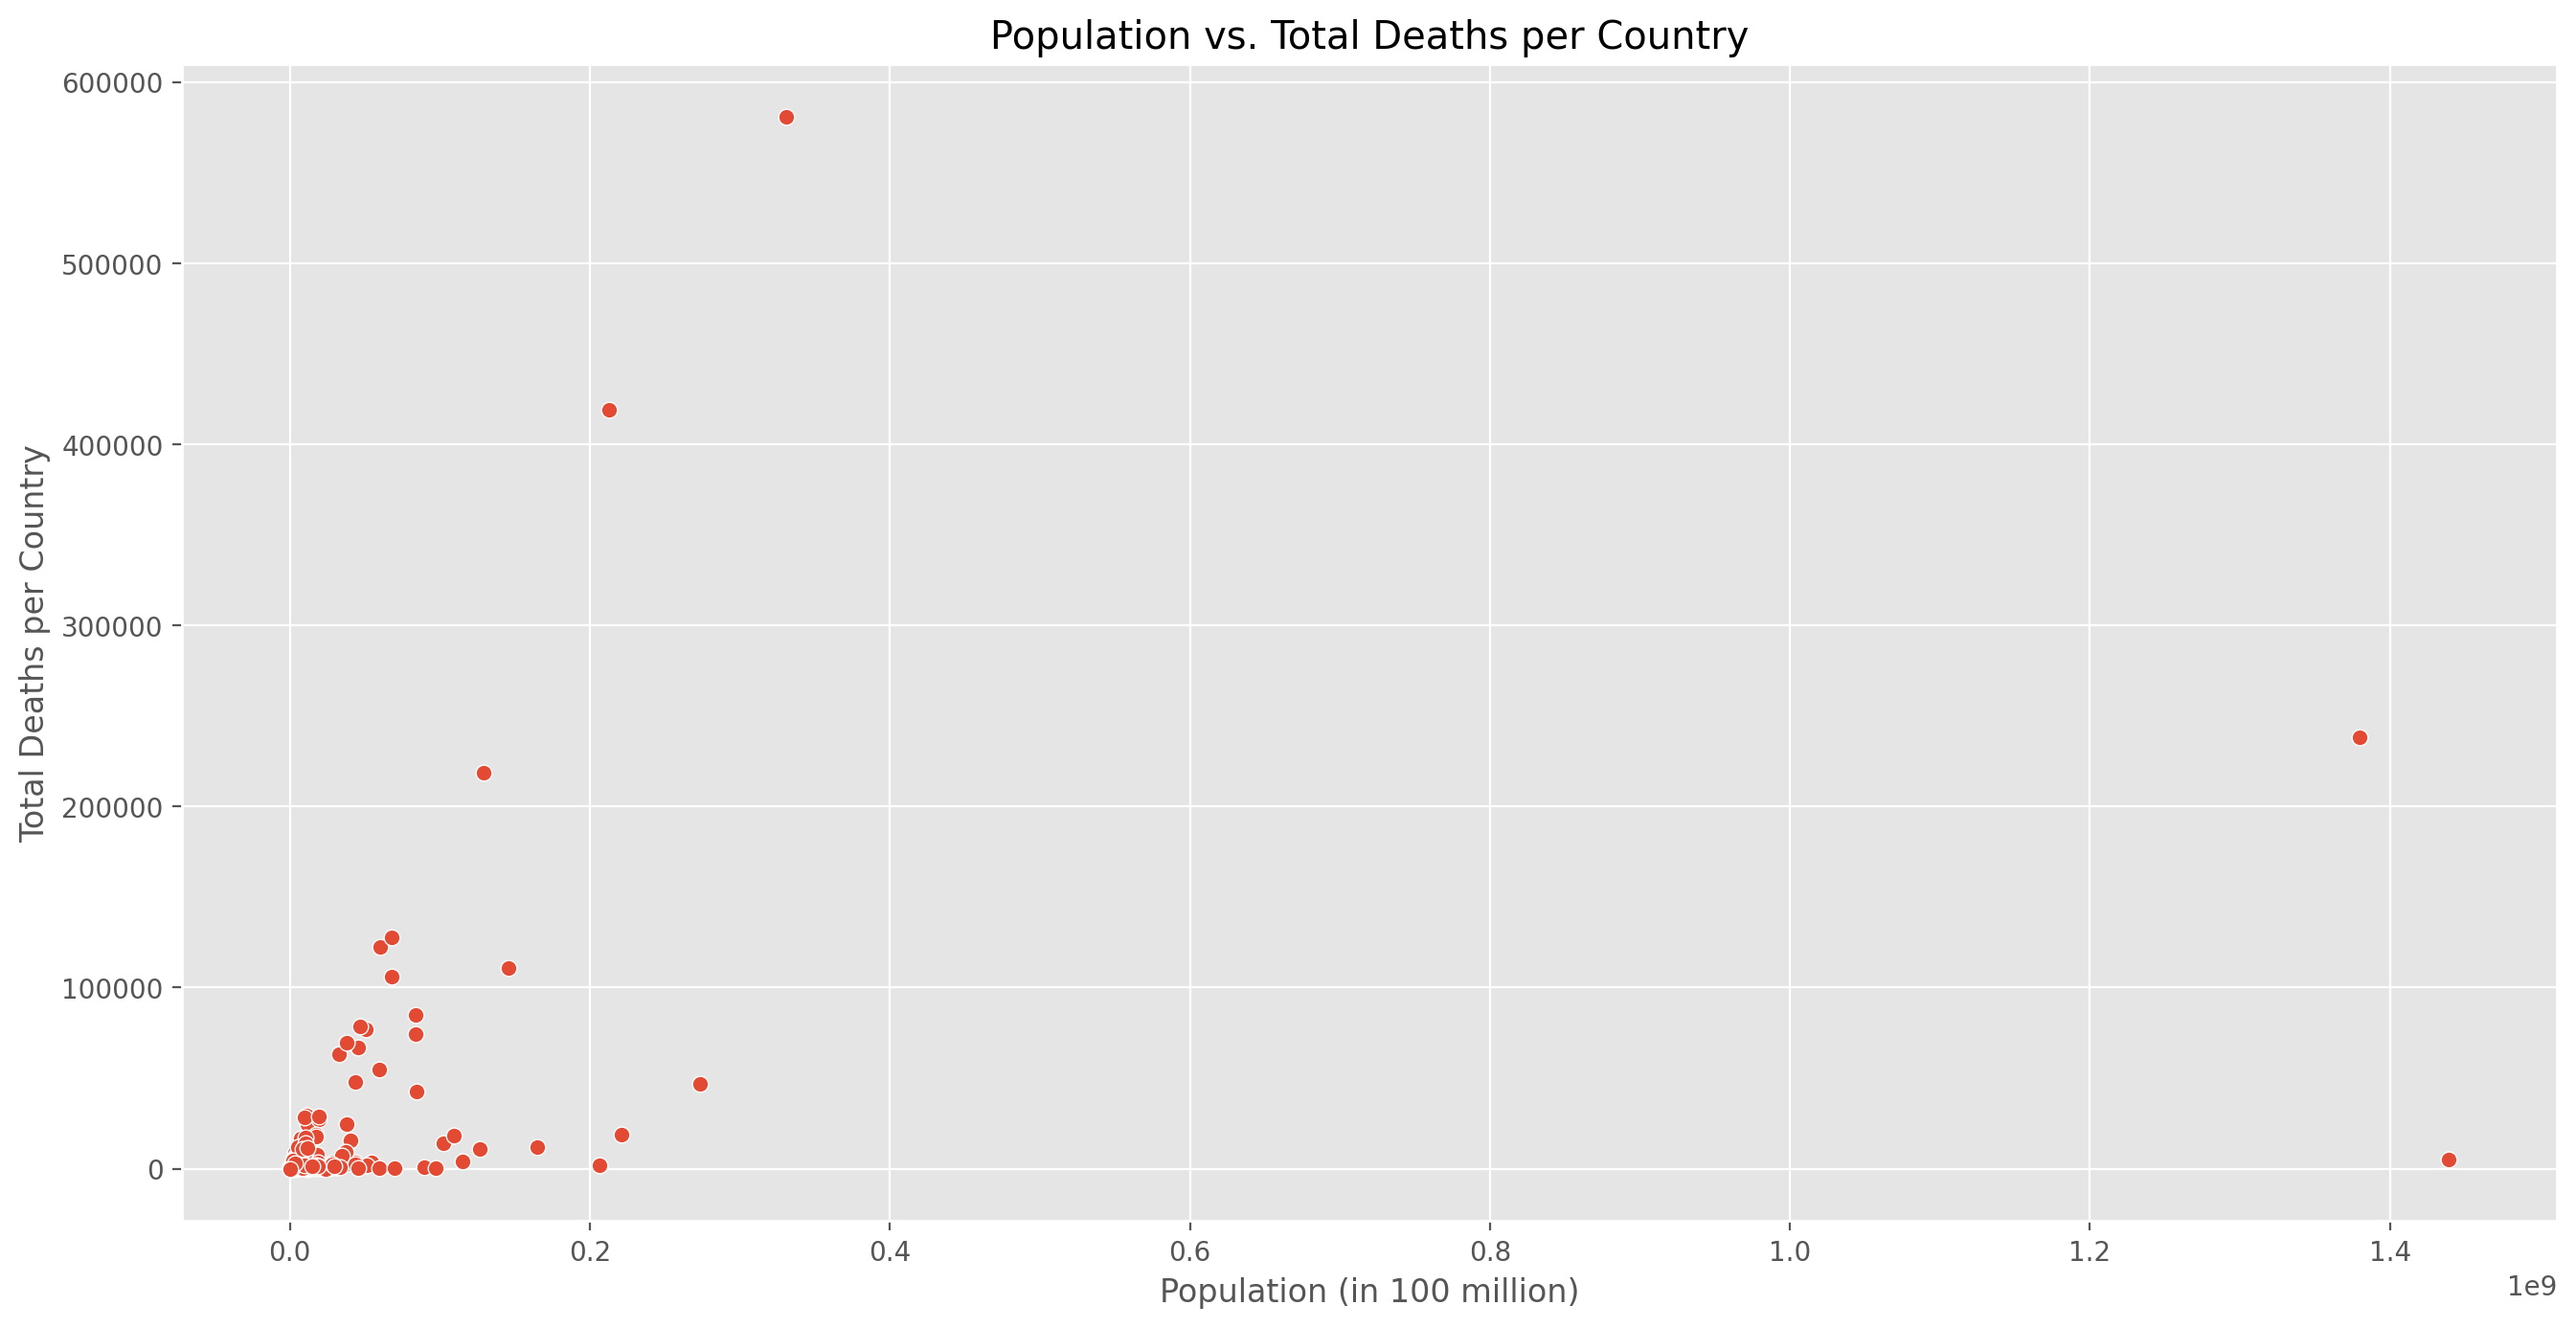

In [39]:
# RAW SCATTERPLOT
plt.figure(figsize=(16, 8), dpi=200)
sns.scatterplot(x="population", y="total_deaths", data=countries)

plt.title("Population vs. Total Deaths per Country")
plt.xlabel("Population (in 100 million)")
plt.ylabel("Total Deaths per Country")

plt.show();

In [25]:
# Removing CHI and IND since there populations are much larger than the rest of the world.
# Only Removing to get a clearer picture of the other countries
countries_exclude_chn_ind = countries.drop(["CHN", "IND"], axis=0)

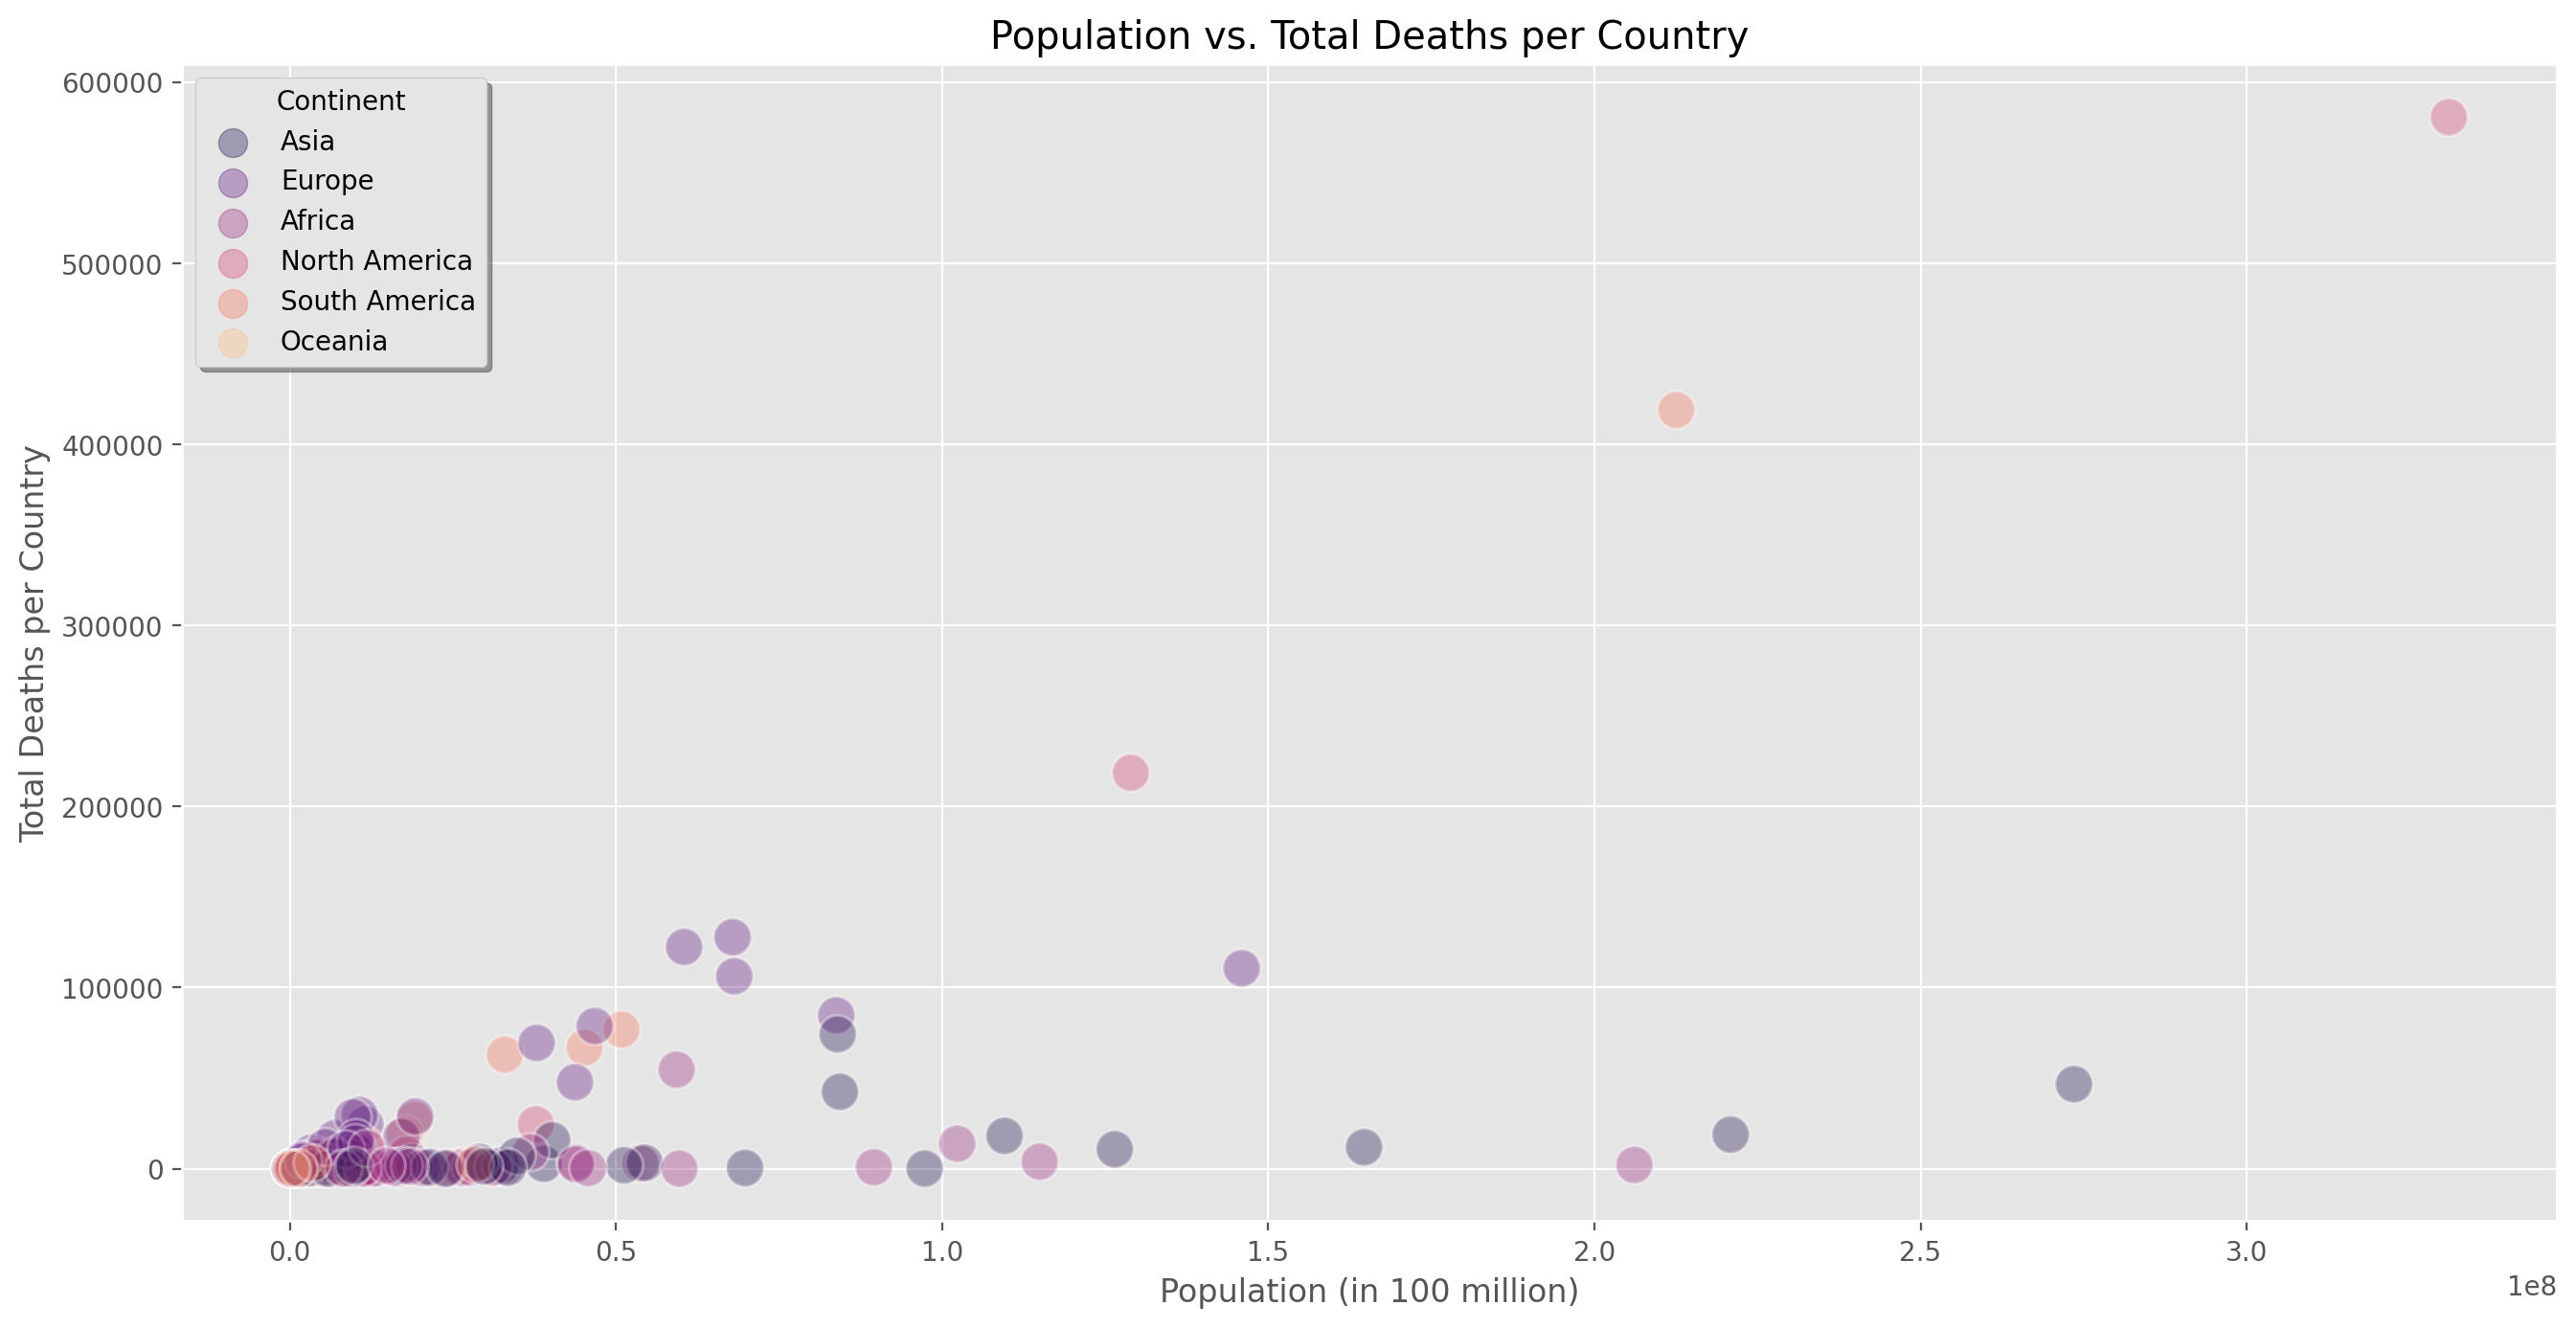

In [54]:
# REFINED SCATTERPLOT
plt.figure(figsize=(16, 8), dpi=200)

pop_deaths_scatter = sns.scatterplot(x="population", 
                y="total_deaths", 
                hue="continent",
                palette="magma",
                alpha=0.35,
                s=200, 
                data=countries_exclude_chn_ind)

plt.legend(title="Continent", 
           shadow=True, 
           markerscale=1.80)

for lh in pop_deaths_scatter.legend_.legendHandles:
    lh.set_alpha(0.35)

plt.title("Population vs. Total Deaths per Country")
plt.xlabel("Population (in 100 million)")
plt.ylabel("Total Deaths per Country")
plt.gca().invert_yaxis()

plt.show();

## Boxplots Measuring Central Tendency of Deaths By Region
* Utilizing OWID entries and omitting individual countries
* ***NOTE:*** JSON contains entry called OWID_WRL which countries world data, when filtering data by region, (i.e OWID_SAM, OWID_NAM, etc) I noticed there was a slight discrepancy in the total population when summing the population over the regions. 
* ***OWID_WRL*** Pop: 7794800000
* Sum of ***OWID_AFR, OWID_ASI, OWID_EUR, OWID_NAM, OWID_OCE, OWID_SAM*** Pop: 7794635392.0
* Slight descrepancy between populations of 164,608

In [27]:
countries.dropna(axis=0, subset=["total_deaths"], inplace=True)

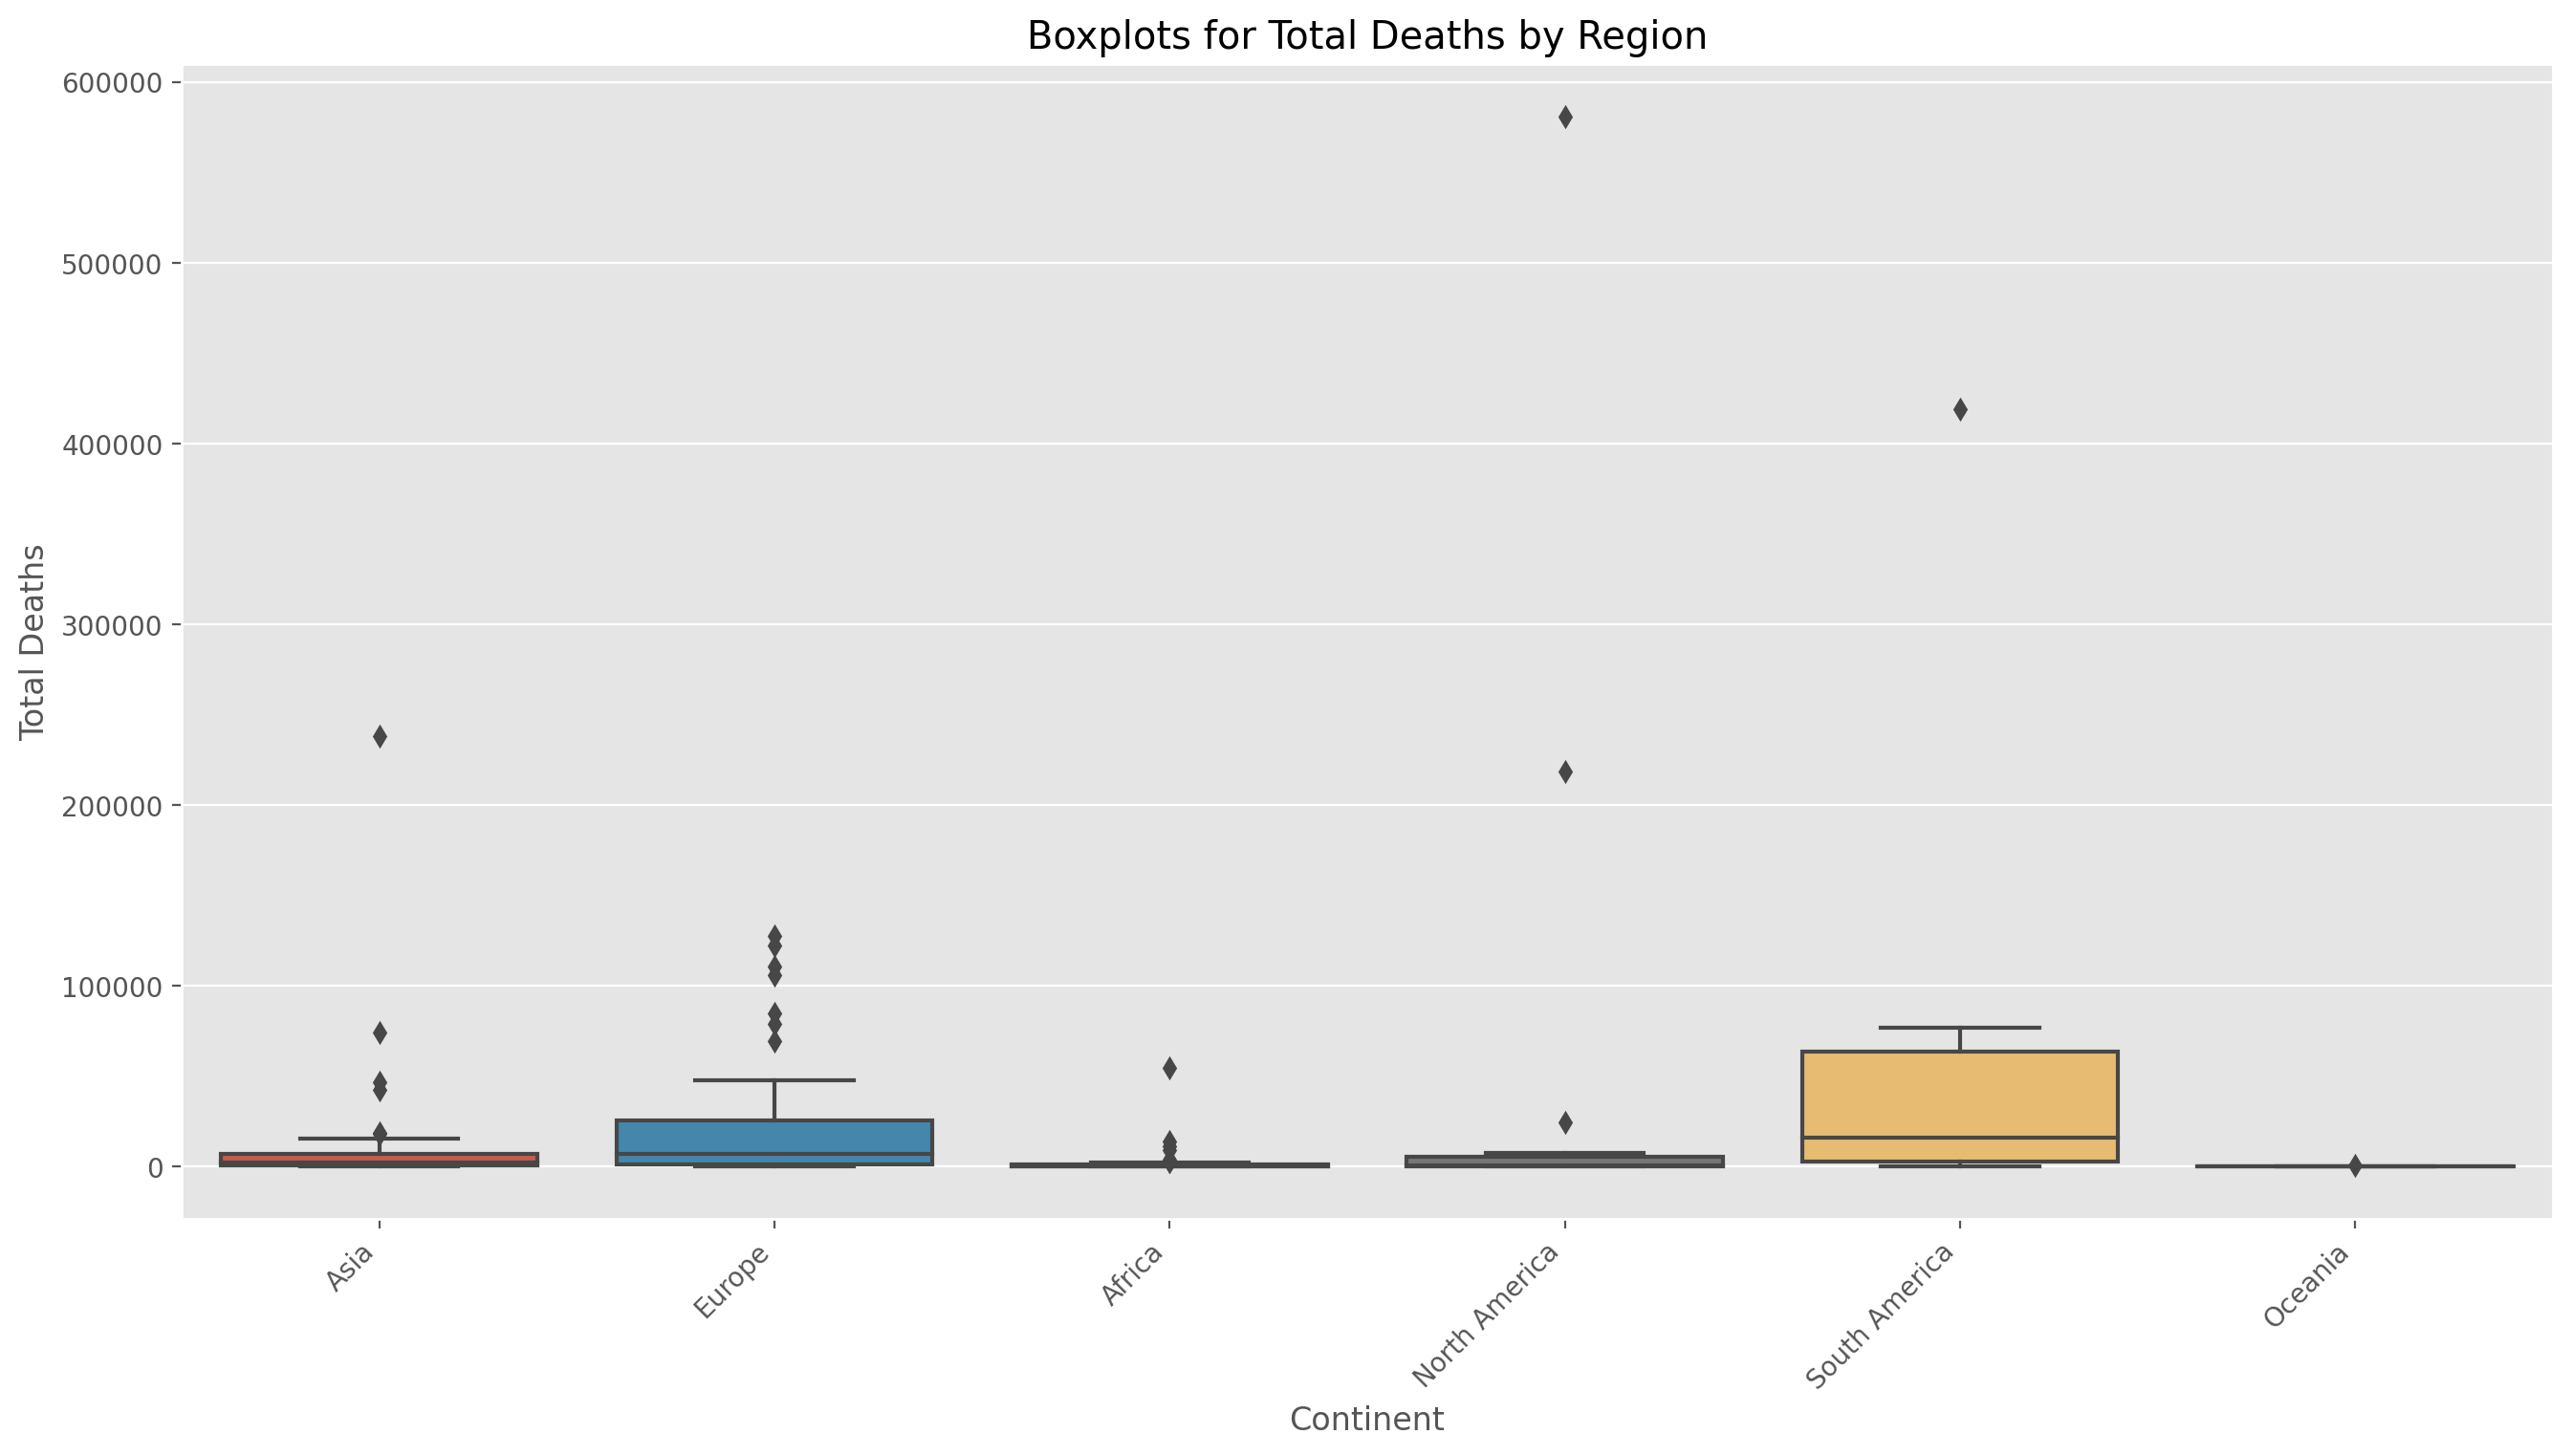

In [28]:
# RAW BOXPLOT
plt.figure(figsize=(16, 8), dpi=200)
sns.boxplot(data=countries, x="continent", y="total_deaths", orient="v")

plt.title("Boxplots for Total Deaths by Region")
plt.xlabel("Continent")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")

plt.show();

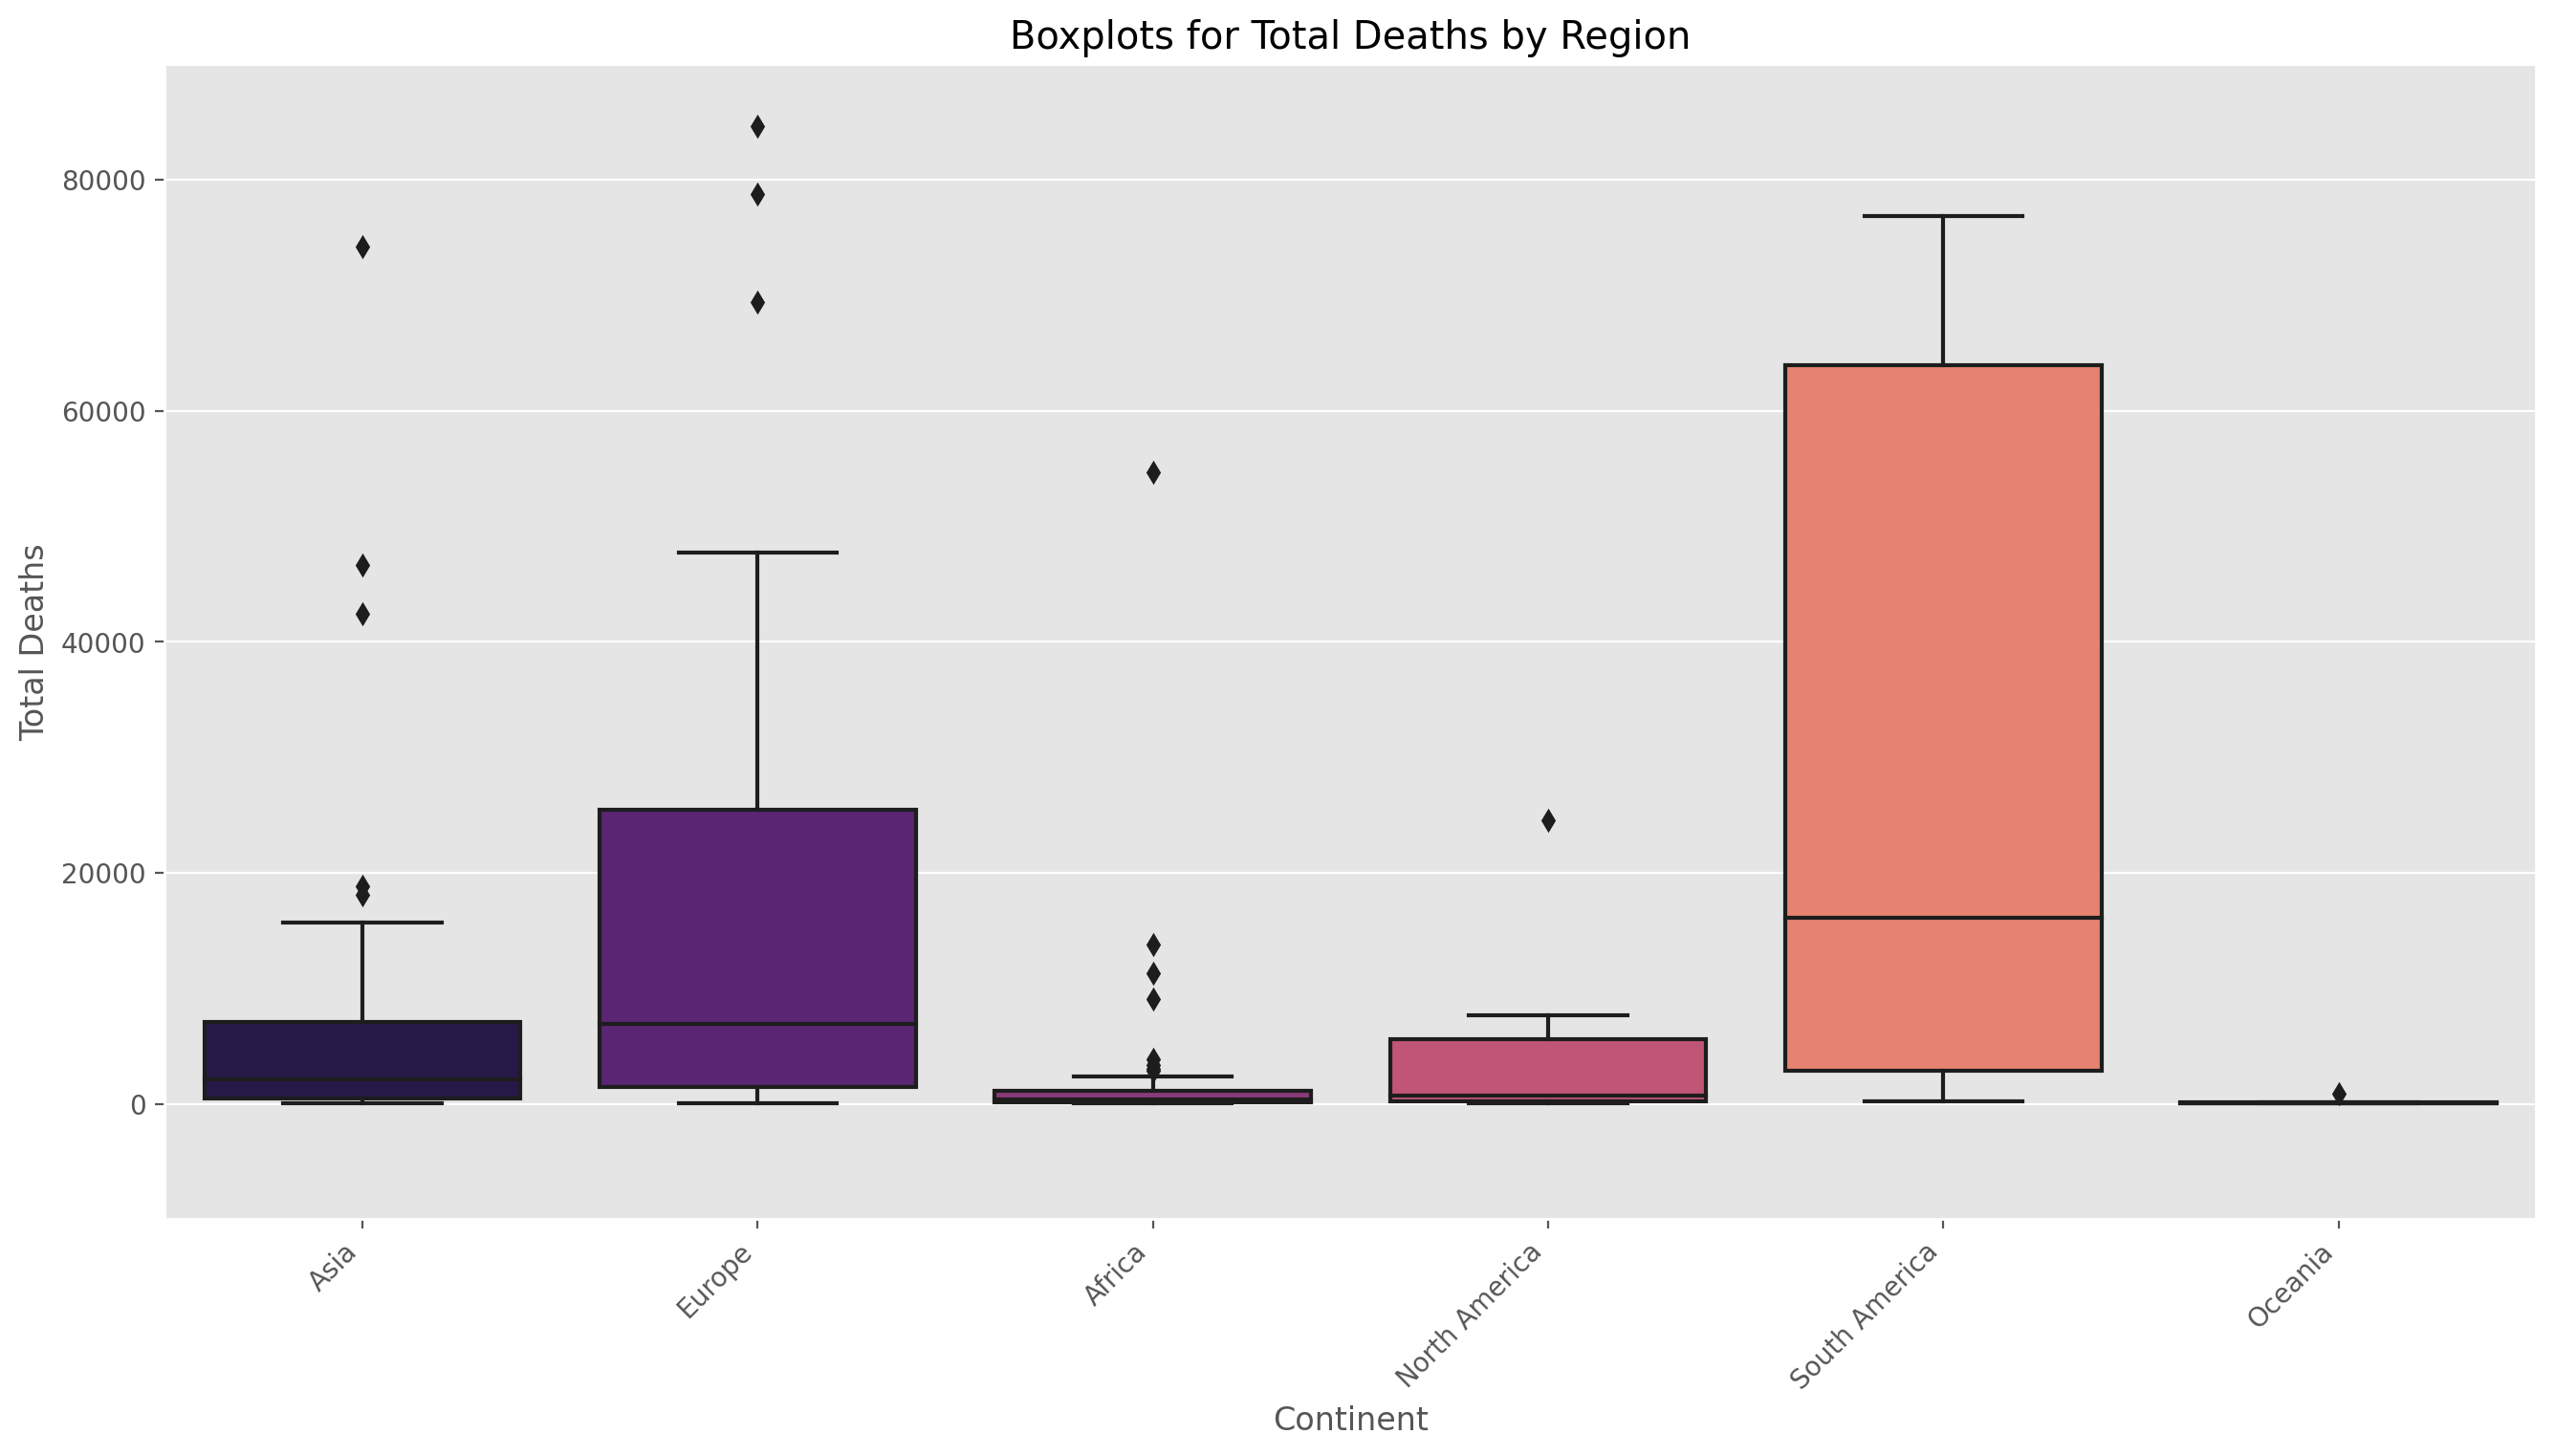

In [29]:
# Limiting y-axis to exclude major outliers
# REFINED BOXPLOT
plt.figure(figsize=(16, 8), dpi=200)
sns.boxplot(data=countries, x="continent", y="total_deaths", palette="magma", orient="v")

plt.title("Boxplots for Total Deaths by Region")
plt.xlabel("Continent")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")
plt.ylim(-10000, 90000)

plt.show();

# Part II: Searching for Linear Relationships Between Features

## Analyzing relationship between Population Density and Total Cases

Let us see if there is a linear correlation between Population Density and Total Cases.

In [71]:
density_cases = countries[["population_density", "total_cases", "continent"]].dropna(axis=0, subset=["population_density", "total_cases"])
density_cases

,population_density,total_cases,continent
AFG,54.422,61455,Asia
ALB,104.871,131577,Europe
DZA,17.348,123692,Africa
AND,163.755,13390,Europe
AGO,23.89,28201,Africa
...,...,...,...
VEN,36.253,205181,South America
VNM,308.127,3137,Asia
YEM,53.508,6446,Asia
ZMB,22.995,92004,Africa


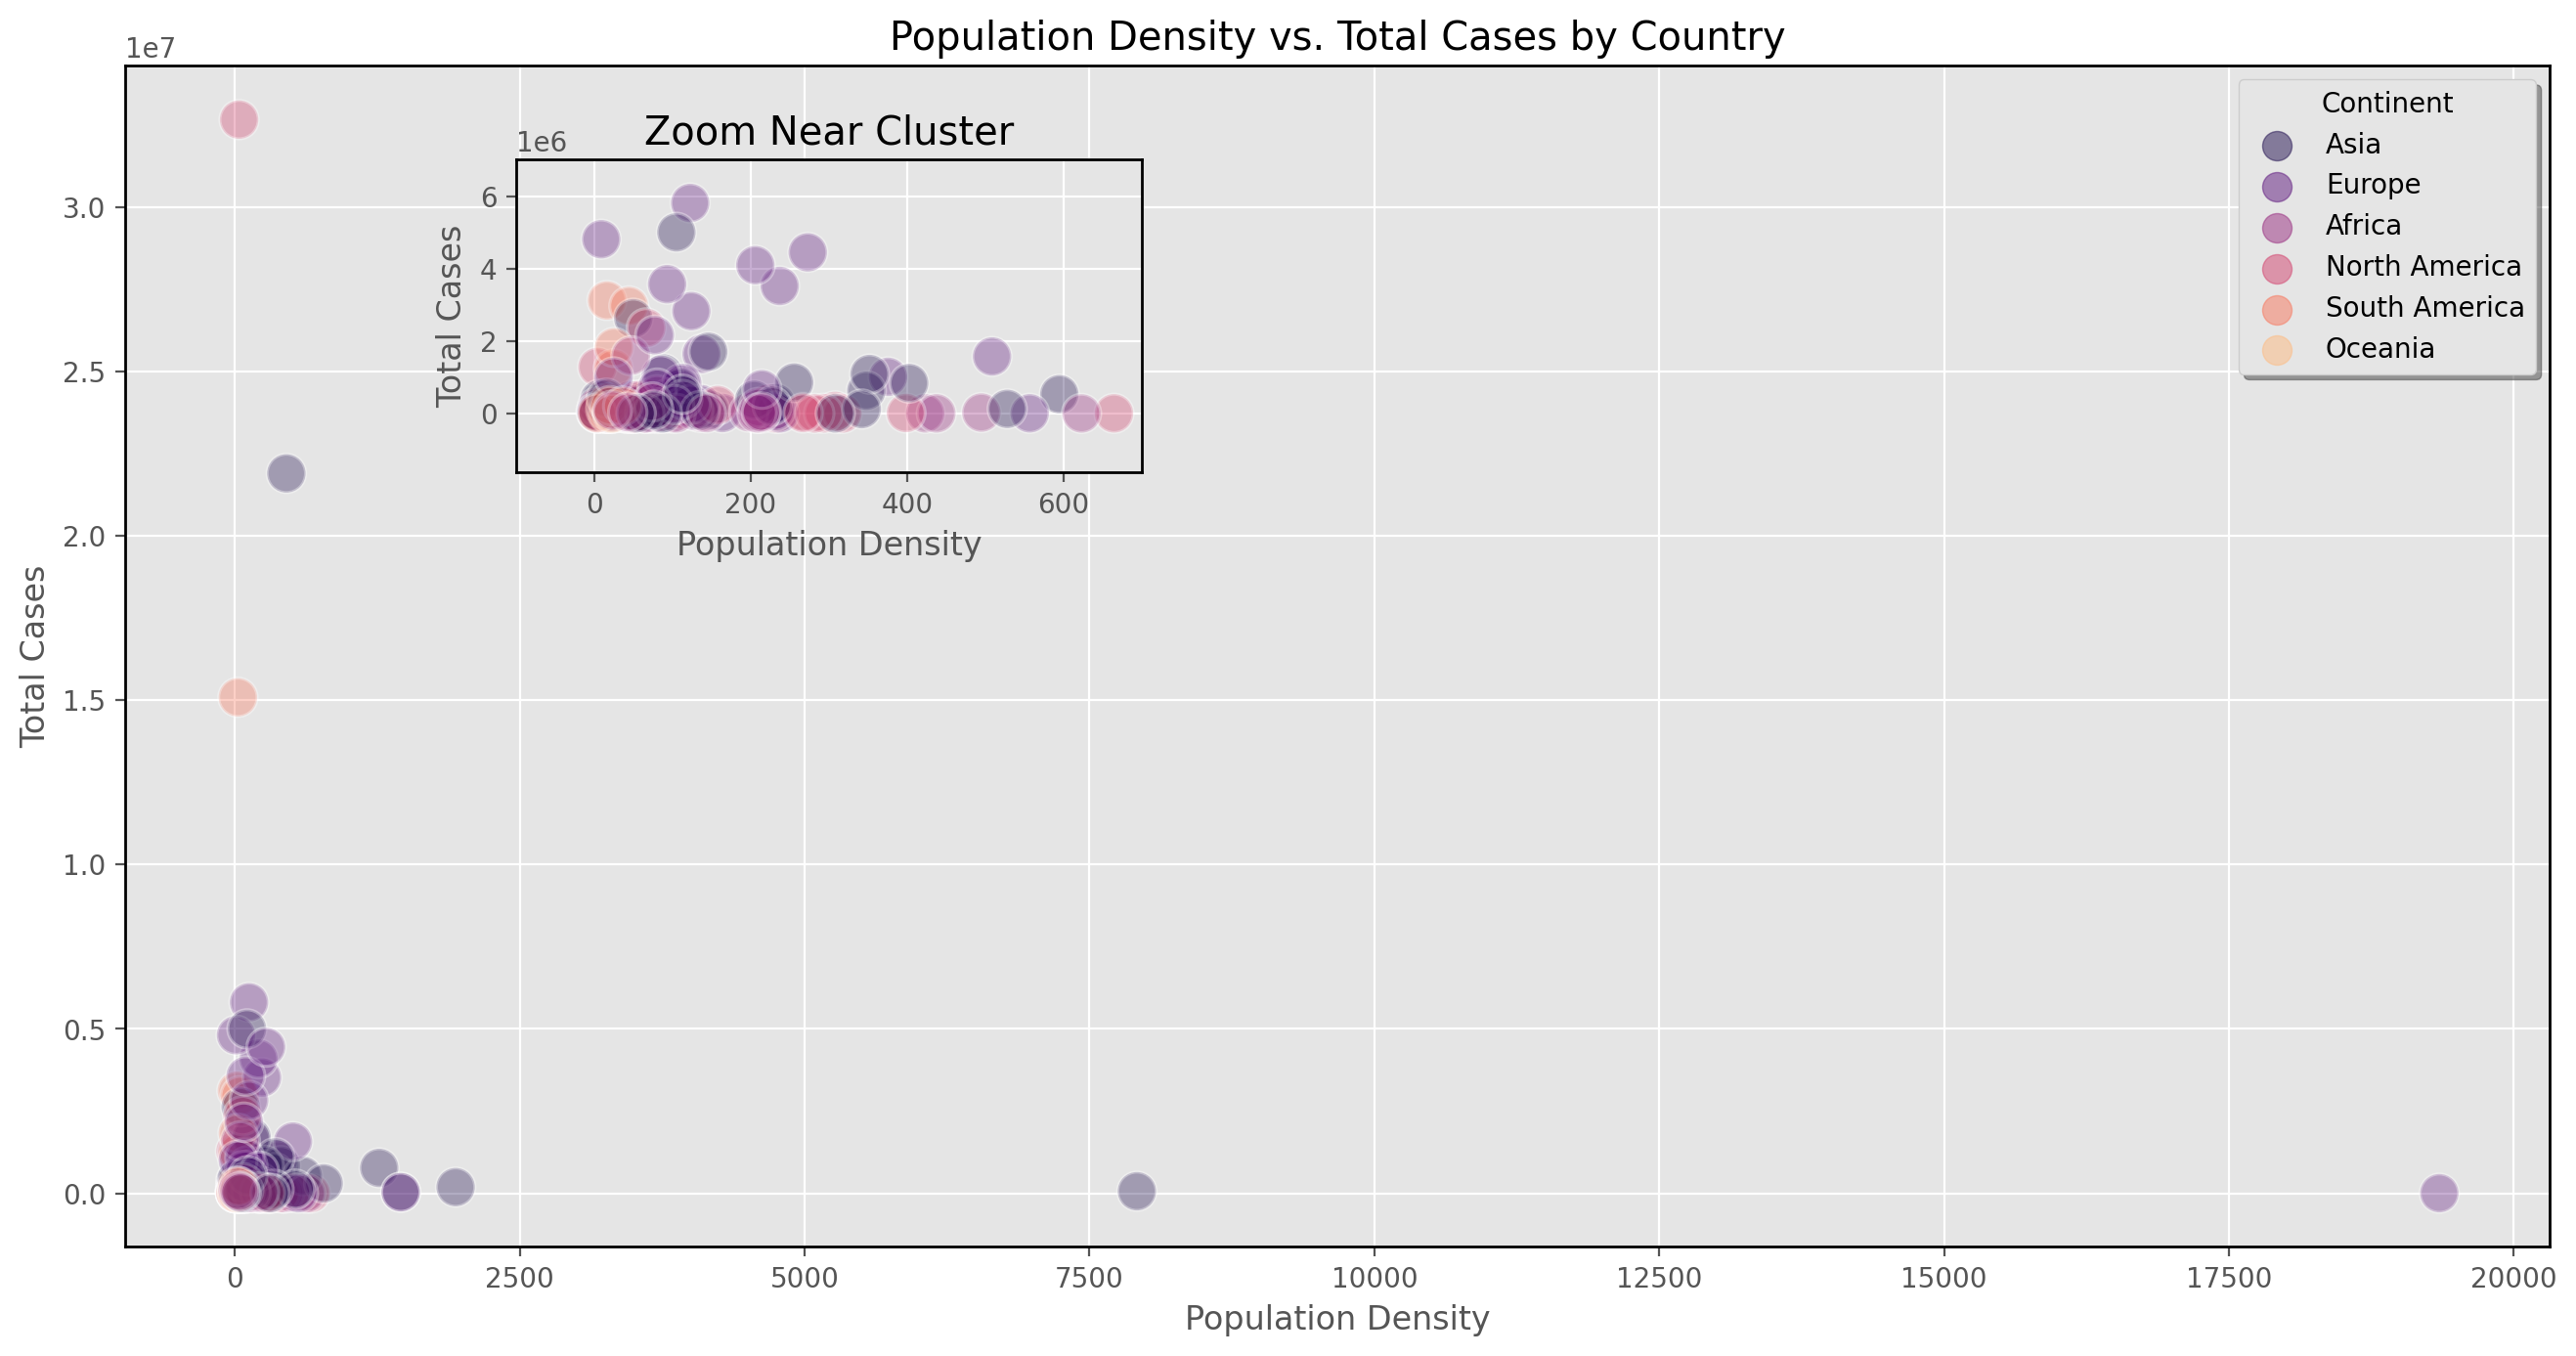

In [88]:
# Creating subplots

fig, ax = plt.subplots(figsize=(16, 8), dpi=200)



# Creating bigger scatterplot with appropriate legend

density_cases_scatter = sns.scatterplot(x="population_density", 
                                        y="total_cases",
                                        hue="continent",
                                        data=density_cases,
                                        alpha=0.35,
                                        s=200,
                                        palette="magma",
                                        ax=ax)

ax.legend(title="Continent",
          shadow=True,
          markerscale=1.80,)

for lh in density_cases_scatter.legend_.legendHandles:
    lh.set_alpha(0.50)

ax.set_title("Population Density vs. Total Cases by Country")
ax.set_xlabel("Population Density")
ax.set_ylabel("Total Cases")
for spine in ["bottom", "top", "left", "right"]:
    ax.spines[spine].set_edgecolor("black") 



# Adding a new axes to create a zoomed in scatterplot

density_cases_zoom = plt.axes([0.25, 0.62, 0.20, 0.20])

sns.scatterplot(x="population_density", 
                y="total_cases", 
                hue="continent", 
                data=density_cases,
                alpha=0.35,
                s=200,
                legend=False,
                palette="magma",
                ax=density_cases_zoom)

density_cases_zoom.set_title("Zoom Near Cluster")
density_cases_zoom.set_xlabel("Population Density")
density_cases_zoom.set_ylabel("Total Cases")
density_cases_zoom.set_xlim(left=-100, right=700)
density_cases_zoom.set_ylim(top=.7e7)
for spine in ["bottom", "top", "left", "right"]:
    density_cases_zoom.spines[spine].set_edgecolor("black")



plt.show()

### Hypothesis Test
It does not appear, visually, that there is any definitive linear relationship between Population Density and Total Cases, but we can use Scipy to calculate the Pearson Correlation Coefficient between these two features to reveal statistical insight. We can define a hypothesis test with the null and alternative hypothesis as follows:

$H_0:$ There is no linear correlation between Population Density and Total Cases.
<br/>
$H_A:$ There is a linear correlation between Population Density and Total Cases.

In [32]:
sp.stats.pearsonr(pop_cases.population_density, pop_cases.total_cases)

(-0.027270669096116928, 0.7178452929154859)

### Conclusion
The correlation coefficient here is $r=-0.02767698362417579$ and the p-value is $p=0.7138235793526161$. The correlation coefficient implies that Population Density and Total Cases have a poor linear correlation. The p-value confirms this since it is much larger than $\alpha=0.05$ which is the commonly accepted threshold for significance levels. Therefore, we can conclude that sufficient evidence does not exist to support the claim that there is a linear correlation between population density and total cases. 

## Analyzing relationship between Total Vaccinations and Total Cases

Let us see if there is a linear correlation between Total Vaccinations and Total Cases.

In [33]:
vaccinations_cases = countries[["total_vaccinations", "total_cases", "continent"]].dropna(axis=0, subset=["total_vaccinations", "total_cases"])
vaccinations_cases

,total_vaccinations,total_cases,continent
ALB,585693,131577,Europe
AND,28881,13390,Europe
ARG,8.82069e+06,3.11813e+06,South America
AUS,2.55453e+06,29906,Oceania
AUT,3.55967e+06,628817,Europe
...,...,...,...
URY,1.9979e+06,216146,South America
UZB,600369,93597,Asia
VNM,509855,3137,Asia
ZMB,64011,92004,Africa


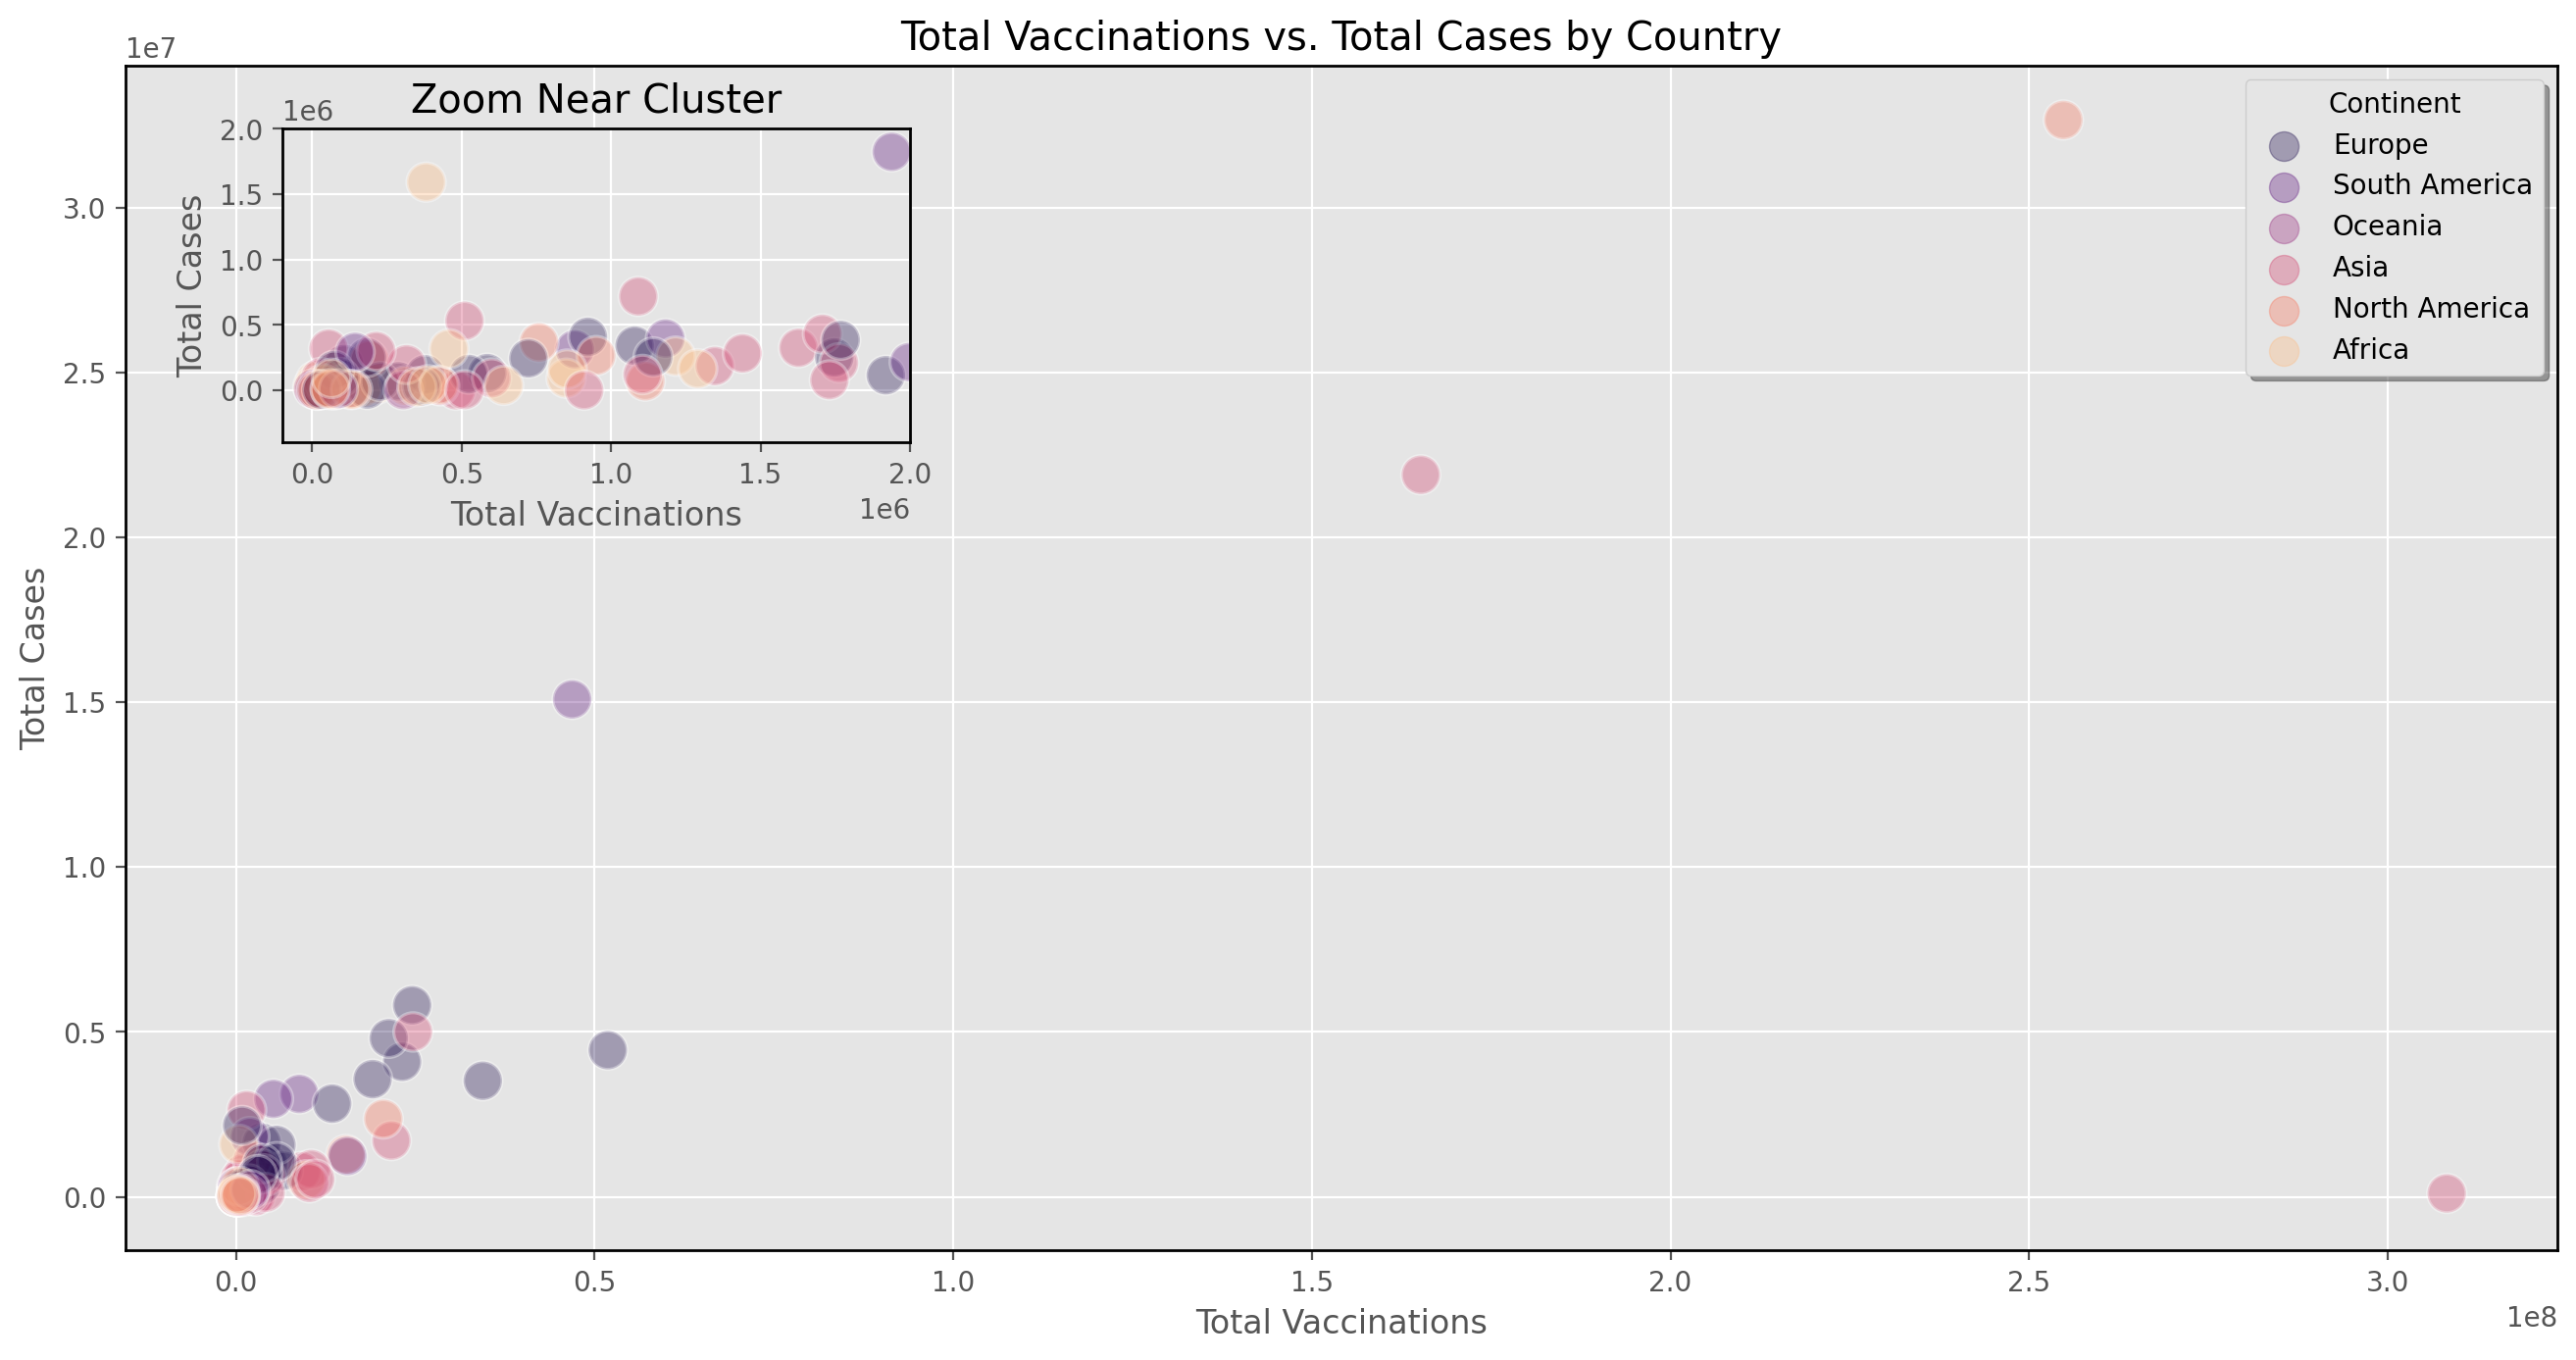

In [89]:
# Creating subplots 

fig, ax = plt.subplots(figsize=(16, 8), dpi=200)



# Configuring bigger scatterplot with its appropriate legend

vaccinations_cases_scatter = sns.scatterplot(x="total_vaccinations", 
                                             y="total_cases", 
                                             hue="continent",
                                             data=vaccinations_cases,
                                             alpha = 0.35,
                                             s=200,
                                             palette="magma",
                                             ax=ax)

ax.legend(title="Continent", 
           shadow=True,
           markerscale=1.8)

for lh in ax.legend_.legendHandles:
    lh.set_alpha(0.35)

ax.set_title("Total Vaccinations vs. Total Cases by Country")
ax.set_xlabel("Total Vaccinations")
ax.set_ylabel("Total Cases")
for spine in ["bottom", "top", "left", "right"]:
    ax.spines[spine].set_edgecolor("black")



# Adding a new axes to create a zoomed in scatterplot

vaccinations_cases_zoom = plt.axes([0.175, 0.64, 0.20, 0.20])

sns.scatterplot(x="total_vaccinations", 
                y="total_cases", 
                hue="continent",
                data=vaccinations_cases,
                alpha=0.35,
                s=200,
                legend=False,
                palette="magma",
                ax=vaccinations_cases_zoom)

vaccinations_cases_zoom.set_title("Zoom Near Cluster")
vaccinations_cases_zoom.set_xlabel("Total Vaccinations")
vaccinations_cases_zoom.set_ylabel("Total Cases")
vaccinations_cases_zoom.set_xlim(left=-0.01e7, right=.02e8)
vaccinations_cases_zoom.set_ylim(bottom=-0.04e7, top=.2e7)
for spine in ["bottom", "top", "left", "right"]:
    vaccinations_cases_zoom.spines[spine].set_edgecolor("black")



plt.show();

### Hypothesis Test
Although it is not completely clear, it appears that there is a positive linear correlation between Total Vaccinations and Total Cases, which is in some ways counterintuitive since we would expect Total Cases to diminsh as the population becomes vaccinated. We can follow the same steps as before and use Scipy to calculate statistical measures and design a formal hypothesis test with:

$H_0:$ There is no linear correlation between Total Vaccinations and Total Cases.
<br/>
$H_A:$ There is a linear correlation between Total Vaccinations and Total Cases.

In [35]:
sp.stats.pearsonr(vaccinations_cases.total_cases, vaccinations_cases.total_vaccinations)

(0.6751380332200111, 6.833004985878647e-19)

The correlation coefficient here is $r=0.6913693206940721$ and the p-value is $p=4.473426365817474\cdot10^{-21}$. The correlation coefficient implies that Population Density and Total Cases have a strong positive linear correlation. The p-value confirms this since it is much smaller than $\alpha=0.05$. Therefore, we can conclude that sufficient evidence exists to support the claim that there is a linear correlation between Total Vaccinations and Total Cases. 

### Further Analysis
It is worth noting that this relationship can be misinterpreted since the names of the features are quite indicative. Someone may look at this and draw the erroneous conclusion that vaccinations cause, or are in some way responsible for a rise in coronavirus cases. However, there are a few important things worth noting. Firstly, these statistics were not being measured overtime&#8212;the numbers represent the most recent aggregation of Total Cases and Total Vaccinations. Furthermore, there might be a confounding variable that could cause an apparent linear corrleation between these two features. Let's see if there exists any relationship between Total Vaccinations and Population, and Total Cases and Population.

In [36]:
vaccinations_pop = countries[["total_vaccinations", "population"]].dropna(axis=0, subset=["total_vaccinations", "population"])
vaccinations_pop

,total_vaccinations,population
ALB,585693,2.8778e+06
AND,28881,77265
ARG,8.82069e+06,4.51958e+07
AUS,2.55453e+06,2.54999e+07
AUT,3.55967e+06,9.0064e+06
...,...,...
URY,1.9979e+06,3.47373e+06
UZB,600369,3.34692e+07
VNM,509855,9.73386e+07
ZMB,64011,1.8384e+07


In [37]:
cases_pop = countries[["total_cases", "population"]].dropna(axis=0, subset=["total_cases", "population"])
cases_pop

,total_cases,population
AFG,61455,3.89283e+07
ALB,131577,2.8778e+06
DZA,123692,4.3851e+07
AND,13390,77265
AGO,28201,3.28663e+07
...,...,...
VEN,205181,2.84359e+07
VNM,3137,9.73386e+07
YEM,6446,2.9826e+07
ZMB,92004,1.8384e+07


### Graphing Total Cases vs. Population and Total Vaccinations vs. Population

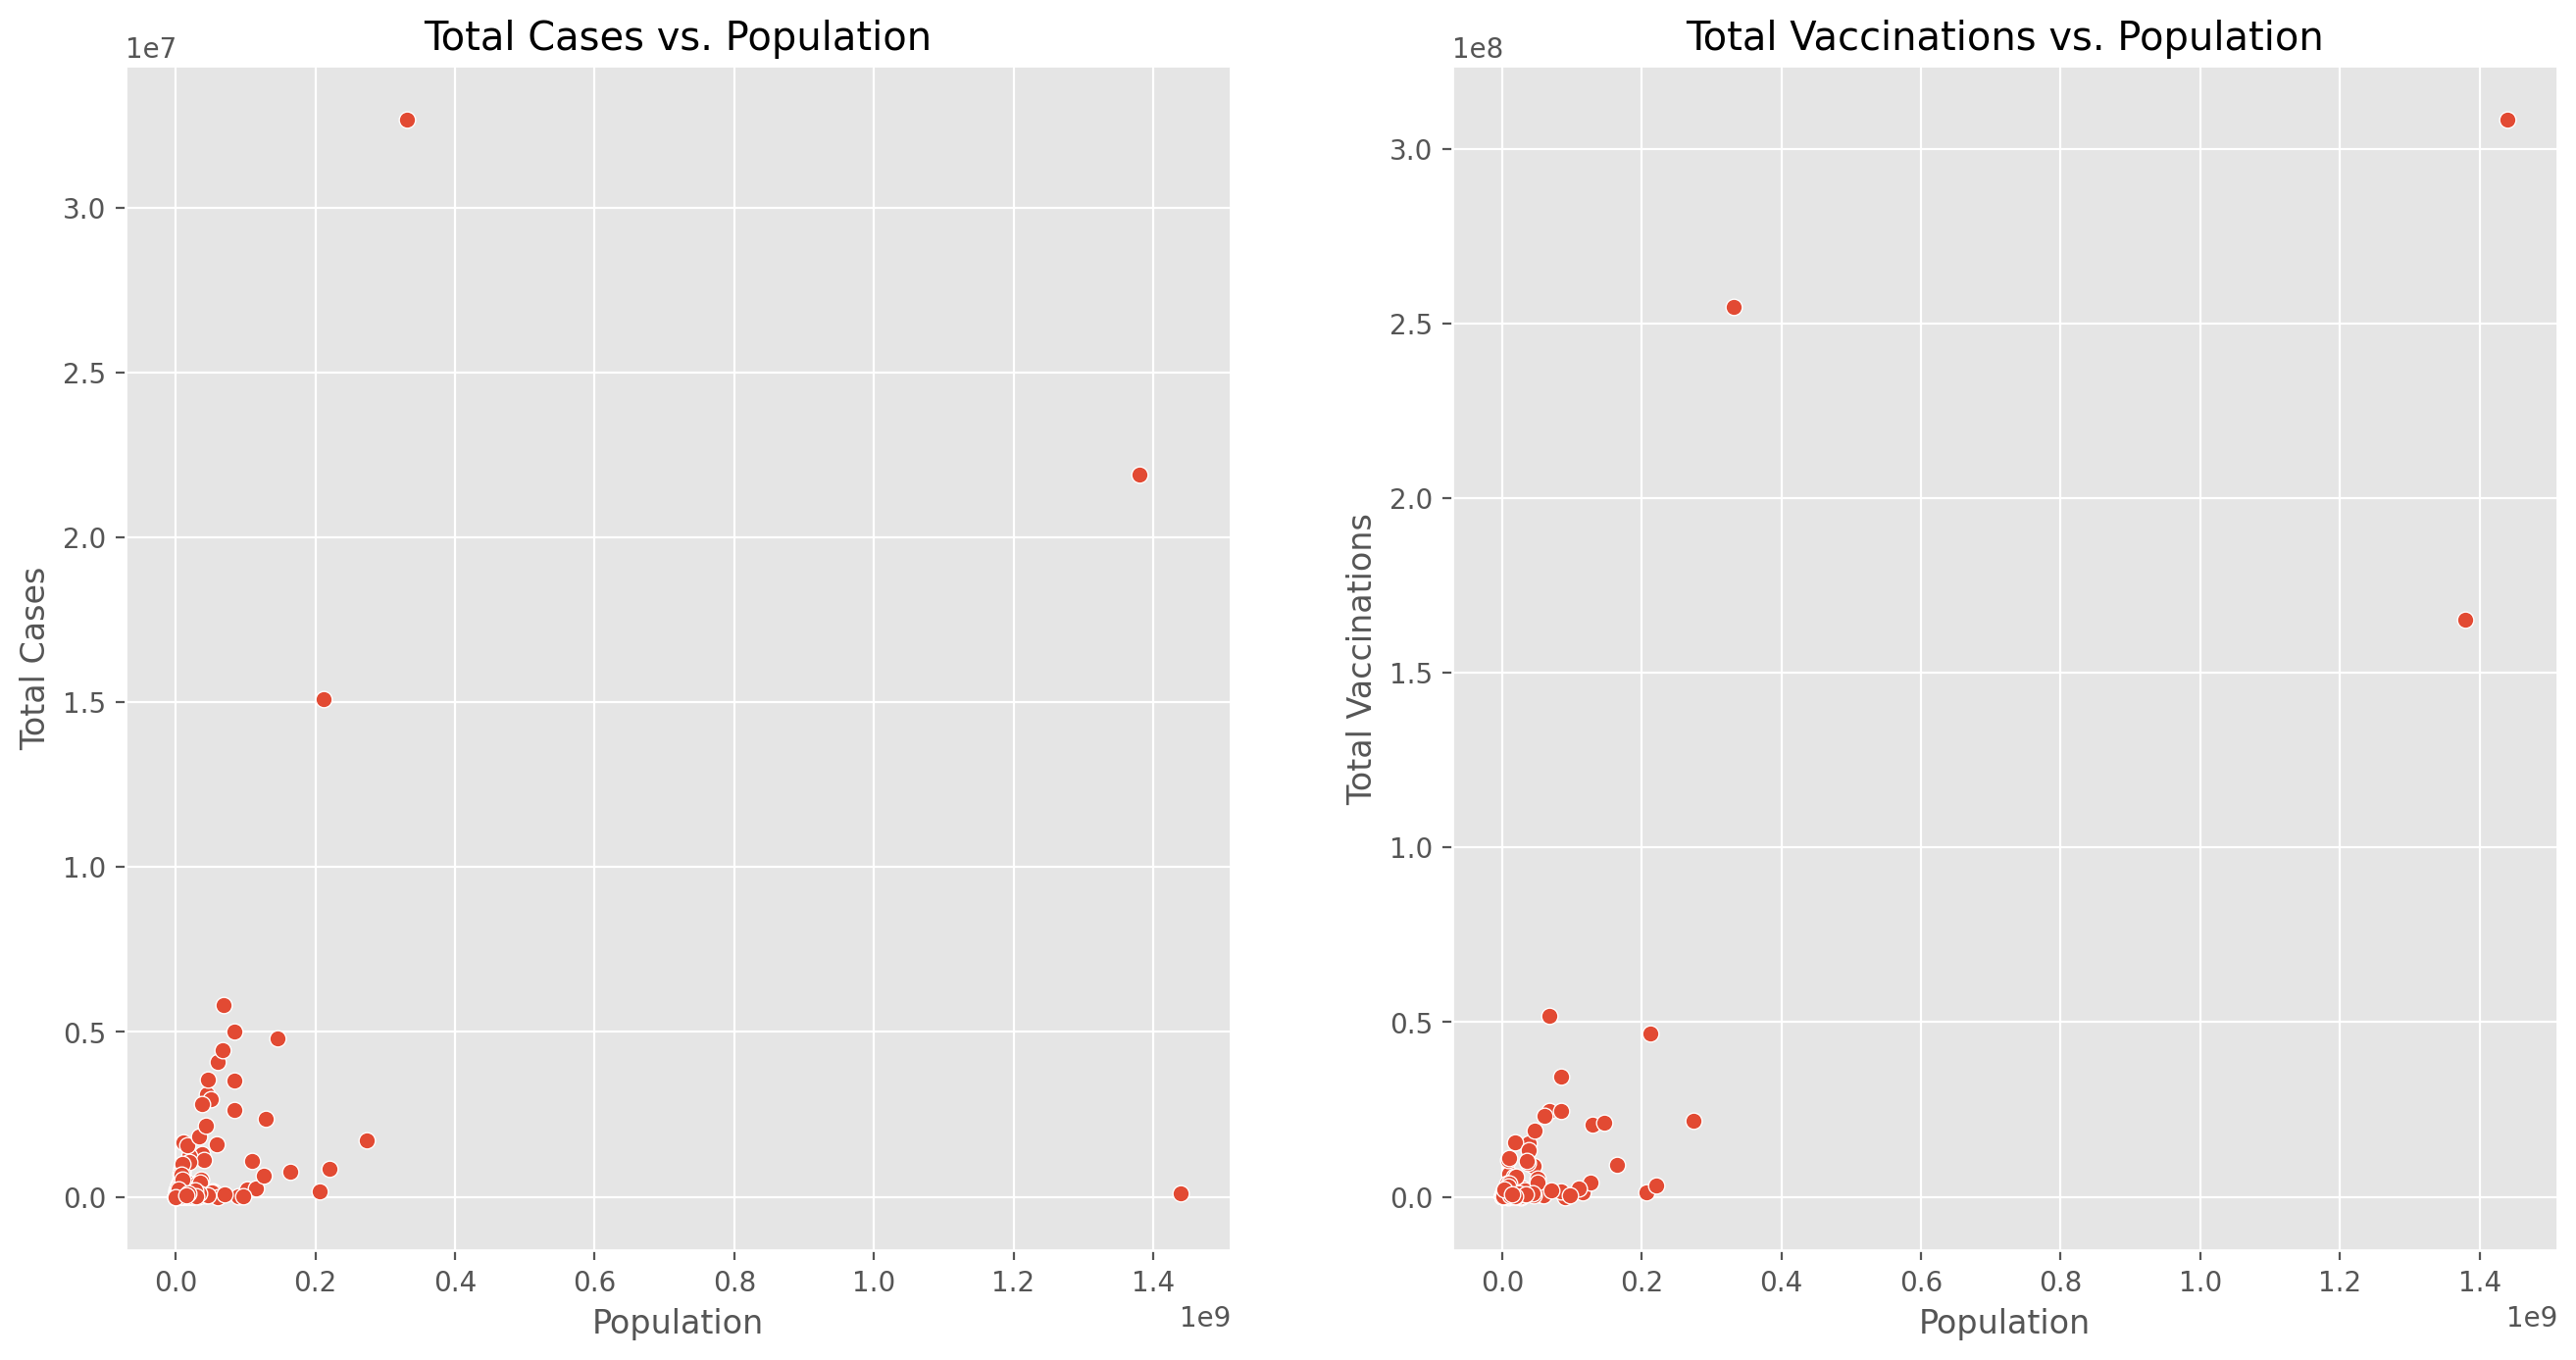

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8), dpi=200)

sns.scatterplot(x="population",
                y="total_cases",
                data=cases_pop,
                ax=ax[0])

ax[0].set_title("Total Cases vs. Population")
ax[0].set_xlabel("Population")
ax[0].set_ylabel("Total Cases")


sns.scatterplot(x="population",
                y="total_vaccinations",
                data=vaccinations_pop,
                ax=ax[1])

ax[1].set_title("Total Vaccinations vs. Population")
ax[1].set_xlabel("Population")
ax[1].set_ylabel("Total Vaccinations")

plt.show()

In [45]:
sp.stats.pearsonr(vaccinations_pop.total_vaccinations, vaccinations_pop.population)

(0.8340646725976024, 2.185160375332159e-35)

In [46]:
sp.stats.pearsonr(cases_pop.total_cases, cases_pop.population)

(0.4857866189705506, 4.153778922054744e-12)

### Conclusion
Here we see that both Total Cases and Total Vaccinations appear to be positively correlated with Population. Total Vaccinations appear to have a strong correlation with Population while Total Vaccinations appears to have a moderate correlation with Population. Thus, it makes sense that Population could be a confounding variable that causes such a strong correlation between Total Cases and Total Vaccinations. This seems like a more logical conclusion since a higher population would imply a greater number of vaccines being distributed and a greater number of SARS-CoV-2 cases being detected. 

# Part III: Introducing Supervised Machine Learning